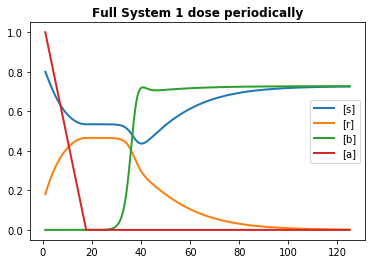

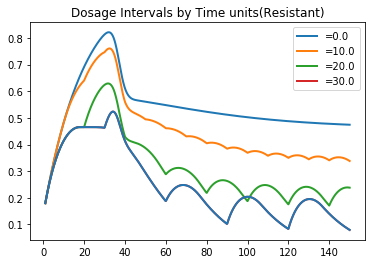

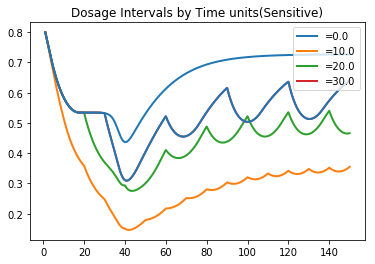

In [1]:
import tellurium as te
import numpy as np
#Model with Population, Imunne System, and Antibiotics normalized
#uses the treatment of a dailt dose
r = te.loada('''
#Equations
R1: ->s;   bs* s*(1-(s+r))-id*s*b - s*ds*a- s*m*a
R2: ->r; (1-c)*bs*r*(1-(s+r)) - id*r*b + s*m*a
R3: ->b; k*b*(1-(b/(w*(s+r))))
R4: a ->; ui
E1: at (a<0): ui =0 , a=0 
E2: at (time%x<1): ui = .06, a=1 
#Parameters
A= 0.260674 #Antibiotic concentration
S=8.0*10^8 #S population of sensitive bacteria
R=1.8*10^8 #R population of Restiance bacteria
B=0.571428 #B population of immune cells
k=.6  #Immune cells growth rate
w= 1
bs= .8 #bs = birth rate of sensitive bacteria per day
c= .3 #bs(1-c) c= fitness cost (0<c<1)
T=1*10^9 #T carryiing capacity
id = .3 # id = death rate from immune cells
ds = 0.0039  # ds = death of senistive pop to antibiotics Isoniazid
ui = .06 #uptake rate of INH
di = 5 #daily dose 
#a= A/(di/ui)
a=1
s= S/T
r= R/T
b= (B/(w*T))
m= .05
x=0
''')

m= r.simulate(1,125,1000)
r.plot(title="Full System 1 dose periodically")

#parameter scan of dosage intervals without maintaing indepedent variable
r.show()
for S in np.arange(0.0,40,10.0):
    r.reset()
    r.x = S
    l = r.simulate(1,150,1000,['time','r'])
    te.plotArray(l,show=False,labels=['='+str(S)],title='Dosage Intervals by Time units(Resistant)',resetColorCycle=False)
te.plotArray(l,show=True)

#parameter scan of dosage intervals 
r.show()
for S in np.arange(0.0,40,10.0):
    r.reset()
    r.x = S
    l = r.simulate(1,150,1000,['time','s'])
    te.plotArray(l,show=False,labels=['='+str(S)],title='Dosage Intervals by Time units(Sensitive)',resetColorCycle=False)
te.plotArray(l,show=True)